In [77]:
#! jupyter nbconvert --to script news_crawling.ipynb

In [78]:
import requests
from bs4 import BeautifulSoup
 
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
# selenium import
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from datetime import datetime, timedelta
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import re
from selenium.common.exceptions import NoSuchElementException 

In [79]:
options = webdriver.ChromeOptions() # 크롬 옵션 객체 생성
# options.add_argument('headless') # headless 모드 설정 -> 해당 옵션 적용 시 PDF 다운 불가
options.add_argument("window-size=1920x1080") # 화면크기(전체화면)
options.add_argument("disable-gpu")
options.add_argument("disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument('--no-sandbox') 

In [80]:
driver = webdriver.Chrome()
# wait seconds...
driver.implicitly_wait(3)

In [81]:
driver.get('https://www.yna.co.kr/politics/index?site=navi_politics_depth01')
time.sleep(3)

# 1. 셀레니움으로 html가져오기
html_source = driver.page_source
# 2. bs4로 html 파싱
soup = BeautifulSoup(html_source, 'html.parser')
time.sleep(0.5)

dtime = soup.select_one('#container > div > div > div.section01 > section > div.list-type038 > ul > li:nth-child(1) > div > div.info-box01 > span.txt-time').get_text().strip()

print(dtime)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.56)
Stacktrace:
	GetHandleVerifier [0x00007FF6616E3E52+31618]
	(No symbol) [0x00007FF66165B0B9]
	(No symbol) [0x00007FF66151888A]
	(No symbol) [0x00007FF6614EDAE5]
	(No symbol) [0x00007FF6615945A7]
	(No symbol) [0x00007FF6615AC131]
	(No symbol) [0x00007FF66158CEB3]
	(No symbol) [0x00007FF66155A46B]
	(No symbol) [0x00007FF66155B001]
	GetHandleVerifier [0x00007FF6619EA02D+3202397]
	GetHandleVerifier [0x00007FF661A36A4D+3516285]
	GetHandleVerifier [0x00007FF661A2C4C0+3473904]
	GetHandleVerifier [0x00007FF661795D56+760454]
	(No symbol) [0x00007FF661666B5F]
	(No symbol) [0x00007FF661661CF4]
	(No symbol) [0x00007FF661661E82]
	(No symbol) [0x00007FF66165122F]
	BaseThreadInitThunk [0x00007FF9320F7344+20]
	RtlUserThreadStart [0x00007FF93393CC91+33]


In [ ]:
dt_lst = []
driver.get('https://www.yna.co.kr/politics/index?site=navi_politics_depth01')

# 현재 페이지
page_num = 1
page_ctl = 3

while True:
    print(f'start : {page_num} page 수집 중, page_ctl:{page_ctl}')
    
    # 1. 셀레니움으로 html 가져오기
    html_source = driver.page_source
    
    # 2. bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)

    for dtime in range(1, 27):  # 한 페이지 당 26개
        # 리뷰 작성일자 수집
        daytime_elem = soup.select_one(f'#container > div > div > div.section01 > section > div.list-type038 > ul > li:nth-child({dtime}) > div > div.info-box01 > span.txt-time')
        
        if daytime_elem:
            daytime = daytime_elem.text.strip()  # 텍스트 데이터 추출 및 공백 제거

            # 수집 데이터 저장
            dt_lst.append(daytime)
        else:
            pass

# 페이지 이동
    try:
        driver.find_element(By.CSS_SELECTOR, f'#container > div > div > div.section01 > section > div.paging.paging-type01 > a:nth-child({page_ctl})').click()
        time.sleep(3)
    except NoSuchElementException:
        break
        
    # 다음 페이지로 넘어가기 위해 셀레니움으로 html 다시 가져오기
    html_source = driver.page_source
    
    # bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)
 
    page_num += 1
    page_ctl += 1
 
    if page_num % 10 == 1:
        page_ctl = 3

politics_df = pd.DataFrame({
              'TIME' : dt_lst,
              'field' : 'politics'
              })
politics_df


start : 1 page 수집 중, page_ctl:3
start : 2 page 수집 중, page_ctl:4
start : 3 page 수집 중, page_ctl:5
start : 4 page 수집 중, page_ctl:6
start : 5 page 수집 중, page_ctl:7
start : 6 page 수집 중, page_ctl:8
start : 7 page 수집 중, page_ctl:9
start : 8 page 수집 중, page_ctl:10
start : 9 page 수집 중, page_ctl:11
start : 10 page 수집 중, page_ctl:12


,TIME,field
0,06-15 00:42,politics
1,06-14 22:56,politics
2,06-14 20:56,politics
3,06-14 19:55,politics
4,06-14 19:51,politics
...,...,...
240,06-12 10:07,politics
241,06-12 10:04,politics
242,06-12 09:39,politics
243,06-12 09:35,politics


In [ ]:
dt_lst = []
driver.get('https://www.yna.co.kr/economy/index?site=navi_economy_depth01')

# 현재 페이지
page_num = 1
page_ctl = 3

while True:
    print(f'start : {page_num} page 수집 중, page_ctl:{page_ctl}')
    
    # 1. 셀레니움으로 html 가져오기
    html_source = driver.page_source
    
    # 2. bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)

    for dtime in range(1, 27):  # 한 페이지 당 26개
        # 리뷰 작성일자 수집
        daytime_elem = soup.select_one(f'#container > div > div > div.section01 > section > div.list-type038 > ul > li:nth-child({dtime}) > div > div.info-box01 > span.txt-time')
        
        if daytime_elem:
            daytime = daytime_elem.text.strip()  # 텍스트 데이터 추출 및 공백 제거

            # 수집 데이터 저장
            dt_lst.append(daytime)
        else:
            pass

# 페이지 이동
    try:
        driver.find_element(By.CSS_SELECTOR, f'#container > div > div > div.section01 > section > div.paging.paging-type01 > a:nth-child({page_ctl})').click()
        time.sleep(3)
    except NoSuchElementException:
        break
        
    # 다음 페이지로 넘어가기 위해 셀레니움으로 html 다시 가져오기
    html_source = driver.page_source
    
    # bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)
 
    page_num += 1
    page_ctl += 1
 
    if page_num % 10 == 1:
        page_ctl = 3

economy_df = pd.DataFrame({
              'TIME' : dt_lst,
              'field' : 'economy'
              })
economy_df

start : 1 page 수집 중, page_ctl:3
start : 2 page 수집 중, page_ctl:4
start : 3 page 수집 중, page_ctl:5
start : 4 page 수집 중, page_ctl:6
start : 5 page 수집 중, page_ctl:7
start : 6 page 수집 중, page_ctl:8
start : 7 page 수집 중, page_ctl:9
start : 8 page 수집 중, page_ctl:10
start : 9 page 수집 중, page_ctl:11
start : 10 page 수집 중, page_ctl:12


,TIME,field
0,06-14 23:49,economy
1,06-14 23:07,economy
2,06-14 20:52,economy
3,06-14 19:22,economy
4,06-14 19:15,economy
...,...,...
240,06-13 10:40,economy
241,06-13 10:35,economy
242,06-13 10:32,economy
243,06-13 10:32,economy


In [ ]:
dt_lst = []
driver.get('https://www.yna.co.kr/society/all?site=navi_society_depth02')

# 현재 페이지
page_num = 1
page_ctl = 3

while True:
    print(f'start : {page_num} page 수집 중, page_ctl:{page_ctl}')
    
    # 1. 셀레니움으로 html 가져오기
    html_source = driver.page_source
    
    # 2. bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)

    for dtime in range(1, 27):  # 한 페이지 당 26개
        # 리뷰 작성일자 수집
        daytime_elem = soup.select_one(f'#container > div > div > div.section01 > section > div.list-type038 > ul > li:nth-child({dtime}) > div > div.info-box01 > span.txt-time')
        
        if daytime_elem:
            daytime = daytime_elem.text.strip()  # 텍스트 데이터 추출 및 공백 제거

            # 수집 데이터 저장
            dt_lst.append(daytime)
        else:
            pass

# 페이지 이동
    try:
        driver.find_element(By.CSS_SELECTOR, f'#container > div > div > div.section01 > section > div.paging.paging-type01 > a:nth-child({page_ctl})').click()
        time.sleep(3)
    except NoSuchElementException:
        break
        
    # 다음 페이지로 넘어가기 위해 셀레니움으로 html 다시 가져오기
    html_source = driver.page_source
    
    # bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)
 
    page_num += 1
    page_ctl += 1
 
    if page_num % 10 == 1:
        page_ctl = 3

society_df = pd.DataFrame({
              'TIME' : dt_lst,
              'field' : 'society'
              })
society_df

start : 1 page 수집 중, page_ctl:3
start : 2 page 수집 중, page_ctl:4
start : 3 page 수집 중, page_ctl:5
start : 4 page 수집 중, page_ctl:6
start : 5 page 수집 중, page_ctl:7
start : 6 page 수집 중, page_ctl:8
start : 7 page 수집 중, page_ctl:9
start : 8 page 수집 중, page_ctl:10
start : 9 page 수집 중, page_ctl:11
start : 10 page 수집 중, page_ctl:12


,TIME,field
0,06-14 23:42,society
1,06-14 22:37,society
2,06-14 21:45,society
3,06-14 21:42,society
4,06-14 21:15,society
...,...,...
235,06-14 10:33,society
236,06-14 10:32,society
237,06-14 10:32,society
238,06-14 10:31,society


In [58]:
dt_lst = []
driver.get('https://www.yna.co.kr/culture/all?site=navi_culture_depth02')

# 현재 페이지
page_num = 1
page_ctl = 3

while True:
    print(f'start : {page_num} page 수집 중, page_ctl:{page_ctl}')
    
    # 1. 셀레니움으로 html 가져오기
    html_source = driver.page_source
    
    # 2. bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)

    for dtime in range(1, 27):  # 한 페이지 당 26개
        # 리뷰 작성일자 수집
        daytime_elem = soup.select_one(f'#container > div > div > div.section01 > section > div.list-type038 > ul > li:nth-child({dtime}) > div > div.info-box01 > span.txt-time')
        
        if daytime_elem:
            daytime = daytime_elem.text.strip()  # 텍스트 데이터 추출 및 공백 제거

            # 수집 데이터 저장
            dt_lst.append(daytime)
        else:
            pass

# 페이지 이동
    try:
        driver.find_element(By.CSS_SELECTOR, f'#container > div > div > div.section01 > section > div.paging.paging-type01 > a:nth-child({page_ctl})').click()
        time.sleep(3)
    except NoSuchElementException:
        break
        
    # 다음 페이지로 넘어가기 위해 셀레니움으로 html 다시 가져오기
    html_source = driver.page_source
    
    # bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)
 
    page_num += 1
    page_ctl += 1
 
    if page_num % 10 == 1:
        page_ctl = 3

culture_df = pd.DataFrame({
              'TIME' : dt_lst,
              'field' : 'culture'
              })
culture_df

start : 1 page 수집 중, page_ctl:3
start : 2 page 수집 중, page_ctl:4
start : 3 page 수집 중, page_ctl:5
start : 4 page 수집 중, page_ctl:6
start : 5 page 수집 중, page_ctl:7
start : 6 page 수집 중, page_ctl:8
start : 7 page 수집 중, page_ctl:9
start : 8 page 수집 중, page_ctl:10
start : 9 page 수집 중, page_ctl:11
start : 10 page 수집 중, page_ctl:12


,TIME,field
0,06-14 23:24,culture
1,06-14 20:00,culture
2,06-14 19:40,culture
3,06-14 19:03,culture
4,06-14 18:48,culture
...,...,...
245,06-13 08:19,culture
246,06-13 08:00,culture
247,06-13 08:00,culture
248,06-13 07:04,culture


In [59]:
dt_lst = []
driver.get('https://www.yna.co.kr/sports/all?site=navi_sports_depth02')

# 현재 페이지
page_num = 1
page_ctl = 3

while True:
    print(f'start : {page_num} page 수집 중, page_ctl:{page_ctl}')
    
    # 1. 셀레니움으로 html 가져오기
    html_source = driver.page_source
    
    # 2. bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)

    for dtime in range(1, 27):  # 한 페이지 당 26개
        # 리뷰 작성일자 수집
        daytime_elem = soup.select_one(f'#container > div > div > div.section01 > section > div.list-type038 > ul > li:nth-child({dtime}) > div > div.info-box01 > span.txt-time')
        
        if daytime_elem:
            daytime = daytime_elem.text.strip()  # 텍스트 데이터 추출 및 공백 제거

            # 수집 데이터 저장
            dt_lst.append(daytime)
        else:
            pass

# 페이지 이동
    try:
        driver.find_element(By.CSS_SELECTOR, f'#container > div > div > div.section01 > section > div.paging.paging-type01 > a:nth-child({page_ctl})').click()
        time.sleep(3)
    except NoSuchElementException:
        break
        
    # 다음 페이지로 넘어가기 위해 셀레니움으로 html 다시 가져오기
    html_source = driver.page_source
    
    # bs4로 html 파싱
    soup = BeautifulSoup(html_source, 'html.parser')
    time.sleep(0.5)
 
    page_num += 1
    page_ctl += 1
 
    if page_num % 10 == 1:
        page_ctl = 3

sports_df = pd.DataFrame({
              'TIME' : dt_lst,
              'field' : 'sports'
              })
sports_df

start : 1 page 수집 중, page_ctl:3
start : 2 page 수집 중, page_ctl:4
start : 3 page 수집 중, page_ctl:5
start : 4 page 수집 중, page_ctl:6
start : 5 page 수집 중, page_ctl:7
start : 6 page 수집 중, page_ctl:8
start : 7 page 수집 중, page_ctl:9
start : 8 page 수집 중, page_ctl:10
start : 9 page 수집 중, page_ctl:11
start : 10 page 수집 중, page_ctl:12


,TIME,field
0,06-14 22:20,sports
1,06-14 22:20,sports
2,06-14 22:10,sports
3,06-14 21:57,sports
4,06-14 21:54,sports
...,...,...
245,06-11 22:26,sports
246,06-11 22:18,sports
247,06-11 22:08,sports
248,06-11 22:05,sports


In [83]:
df = pd.concat([sports_df, culture_df, society_df, economy_df, politics_df], ignore_index=True)

In [84]:
# 'TIME' 열을 datetime 형식으로 변환하여 사용하기
df['TIME'] = pd.to_datetime(df['TIME'], format='%m-%d %H:%M')

# 각각의 시간 요소를 추출하여 새로운 열로 추가
df['hour'] = df['TIME'].dt.hour
df['minute'] = df['TIME'].dt.minute
df['date'] = df['TIME'].dt.day
df['month'] = df['TIME'].dt.month

# 'TIME' 열 제거
df = df.drop(columns=['TIME'])

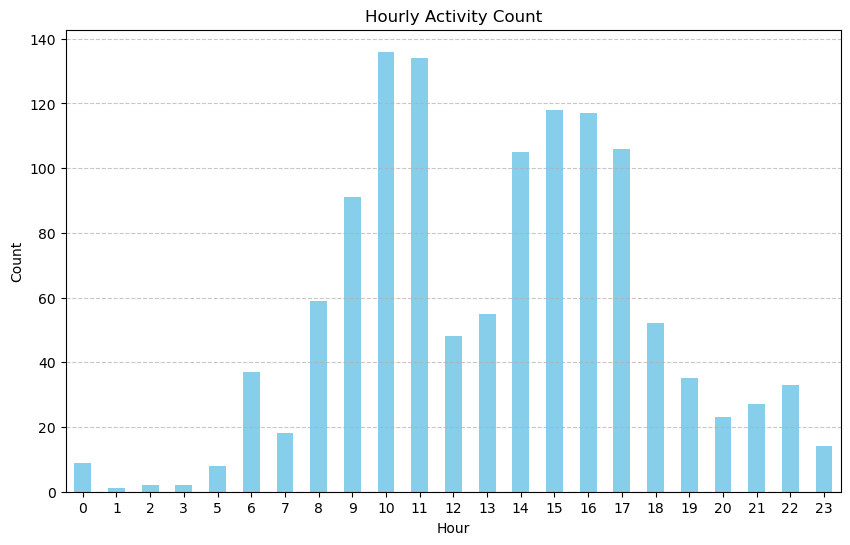

In [85]:
hourly_counts = df.groupby('hour').size()
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Hourly Activity Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

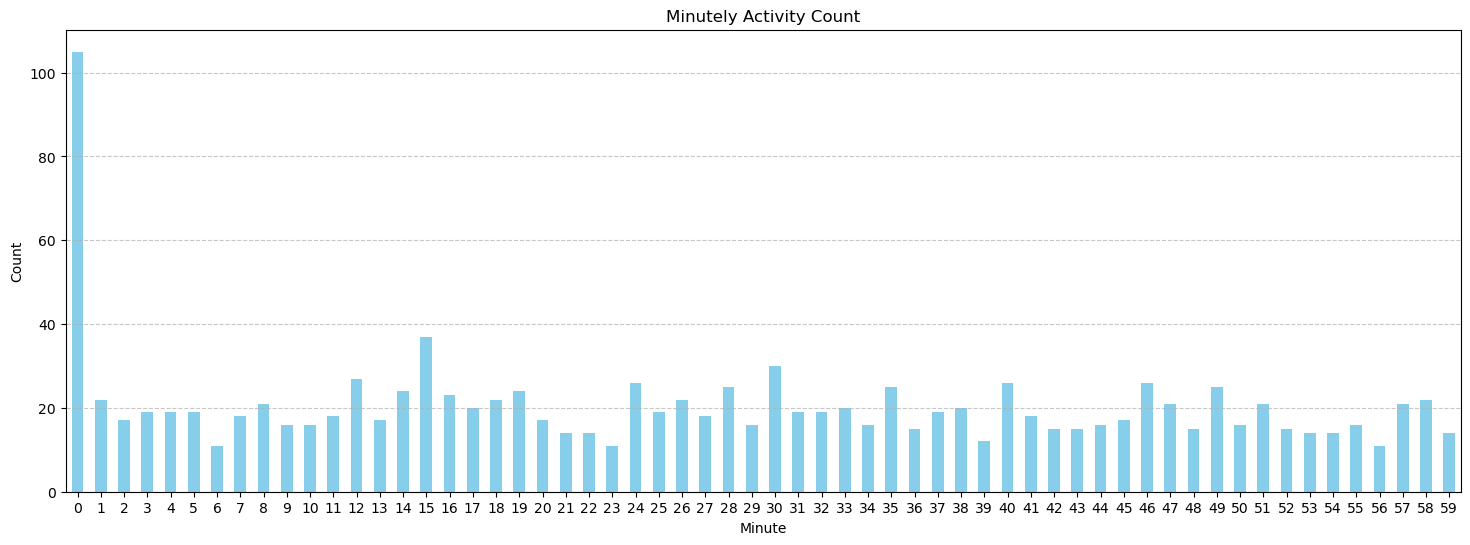

In [92]:
hourly_counts = df.groupby('minute').size()
plt.figure(figsize=(18, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Minutely Activity Count')
plt.xlabel('Minute')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

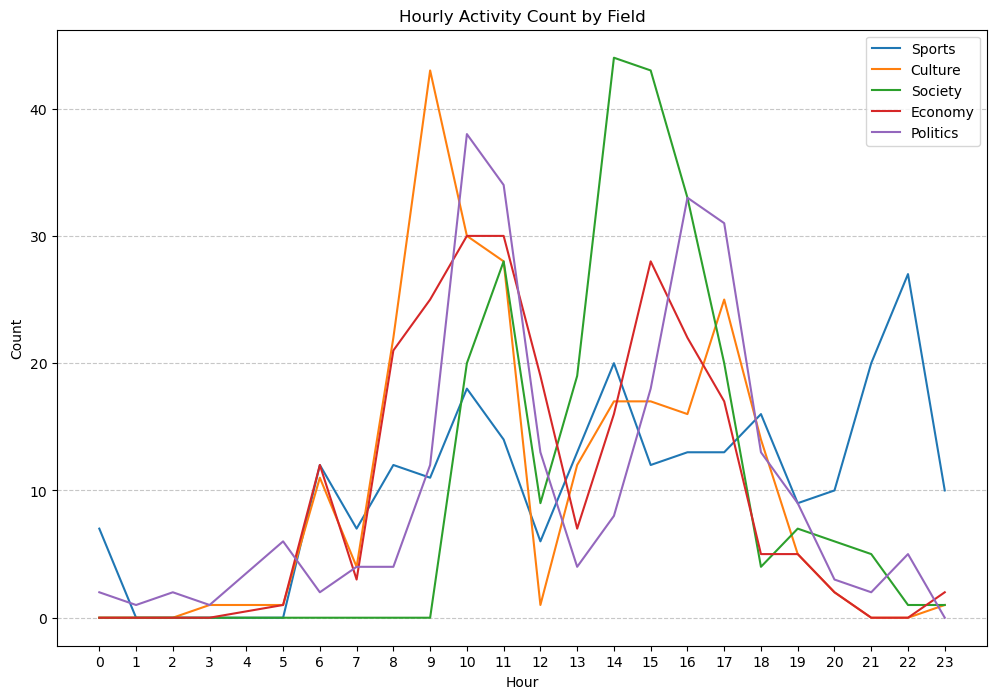

In [88]:
# 필터링할 분야 리스트
fields = ['sports', 'culture', 'society', 'economy', 'politics']

# 각 분야별 시간대별 활동 건수 계산
hourly_counts = {field: df[df['field'] == field].groupby('hour').size() for field in fields}

# 데이터프레임으로 변환
hourly_counts_df = pd.DataFrame(hourly_counts).fillna(0)

plt.figure(figsize=(12, 8))

# 각 분야별로 선그래프 그리기
for field in fields:
    plt.plot(hourly_counts_df.index, hourly_counts_df[field], label=field.capitalize())

plt.title('Hourly Activity Count by Field')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

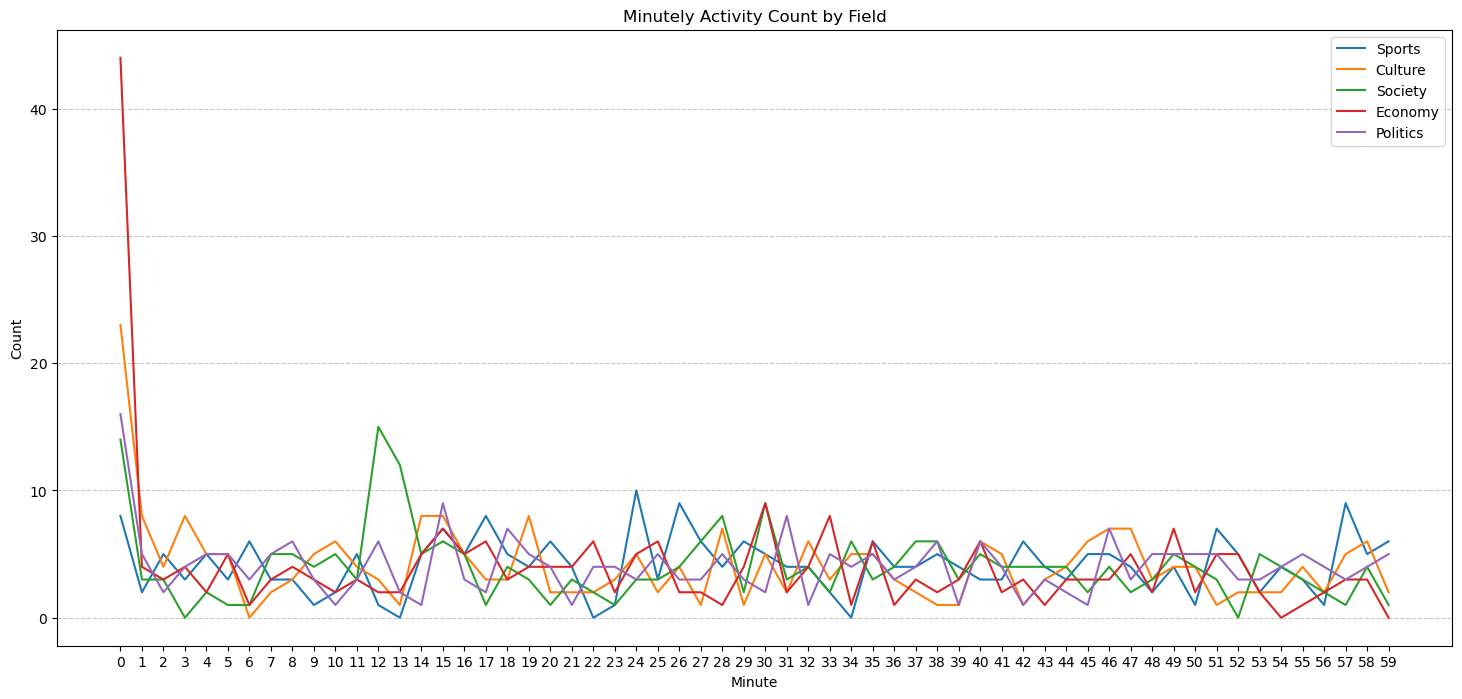

In [94]:
# 각 분야별 시간대별 활동 건수 계산
minute_counts = {field: df[df['field'] == field].groupby('minute').size() for field in fields}

# 데이터프레임으로 변환
minute_counts_df = pd.DataFrame(minute_counts).fillna(0)

plt.figure(figsize=(18, 8))

# 각 분야별로 선그래프 그리기
for field in fields:
    plt.plot(minute_counts_df.index, minute_counts_df[field], label=field.capitalize())

plt.title('Minutely Activity Count by Field')
plt.xlabel('Minute')
plt.ylabel('Count')
plt.xticks(range(0, 60))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
result_df.to_csv('time.csv', index=False, encoding='utf-8-sig')

In [ ]:
time_df = pd.DataFrame(columns=['ID', 'TIME'])
start_id = 0
end_id = 100
for index in range(start_id, end_id + 1):
    try:
        time = soup.select_one(f'#REVIEW > div > div._2LvIMaBiIO > div._2g7PKvqCKe > ul > li:nth-child({index}) > div > div > div > div._3-1uaKhzq4 > div > div._1McWUwk15j > div._3z6gI4oI6l > div > span')
        new_row = pd.DataFrame({'ID': [index], 'TIME':[time]})
        review_df = pd.concat([time_df, new_row], ignore_index=True)
    except AttributeError:
        print('에러 발생: 해당 인덱스의 리뷰를 찾을 수 없습니다.')
        continue
    else:
        print(f'{index}번째 리뷰를 성공적으로 추가했습니다.')
        
time_df